In [ ]:
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import requests
import requests_oauthlib
plt.style.use('fivethirtyeight')

In [ ]:
# Replace the values below with yours
ACCESS_TOKEN = '1063812383628386304-38F6H8SiJ7dCoMs6ZfPSUplDzb1sPk'
ACCESS_SECRET = 'ESg5Jkj1F7nq2W2xFQt0axNdYTQKexSaQBKZJj4SC9bRJ'
CONSUMER_KEY = 'DrIbP9RGfeWAJgMZ2XVLUOF1s'
CONSUMER_SECRET = 'XOvl7AjR06z8XTWMXRELdFPq0A4fRig8jddOureIV53fumw7cy'


In [ ]:
from google.colab import files
uploaded = files.upload()

In [ ]:
authenticate = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
authenticate.set_access_token(ACCESS_TOKEN, ACCESS_SECRET)
api = tweepy.API(authenticate, wait_on_rate_limit=True)

In [ ]:
#extract 100 tweets from twitter user
posts = api.user_timeline(screen_name="BillGates", count=100, lang="en", tweet_mode="extended")

#print last 5 tweets from the account
print("show the 5 recent tweets:\n")
i = 1
for tweet in posts[0:5]:
   print(str(i) + ') '+ tweet.full_text + '\n')
   i = i + 1

show the 5 recent tweets:

1) Robots will play a huge part in our future, and fiction like Kazuo Ishiguro's Klara and the Sun is a great way to explore what that might mean. https://t.co/qlotAHk0ST

2) Accelerating long-duration energy storage innovation can significantly reduce annual CO2 emissions and lay the foundation for a net-zero economy by 2050. https://t.co/P2I5OcQEXa

3) The @gatesfoundation is supporting GIISER which is working to increase the in-country capacity for rapid evaluation of variants on the African continent. This will help us better understand variants of concern and how the current vaccines may perform. https://t.co/yz9XWS4LWH

4) South Africa did the right thing by reporting these cases. They have invested heavily in R&amp;D including genomic sequencing capabilities which have made it possible to quickly identify variants, like Omicron, and help the world respond appropriately.

5) Experts like Trevor Bedford have done an excellent job explaining what scientis

In [ ]:
df = pd.DataFrame( [tweet.full_text for tweet in posts] ,columns=['Tweets'])
df.head()

,Tweets
0,"Robots will play a huge part in our future, an..."
1,Accelerating long-duration energy storage inno...
2,The @gatesfoundation is supporting GIISER whic...
3,South Africa did the right thing by reporting ...
4,Experts like Trevor Bedford have done an excel...


In [ ]:
#create a function to clean the tweets
def cleanTxt(text):
  text=re.sub(r'@[A-Za-z0-9]+', '', text) #remove @mentions
  text=re.sub(r'#','', text) #remove the # symbol
  text=re.sub(r'RT[\s]+', '', text) #removing RT
  text=re.sub(r'https?:\/\/\S+', '', text) #removing the Hyperlink

  return text


df['Tweets']= df['Tweets'].apply(cleanTxt)
df
 

,Tweets
0,"Robots will play a huge part in our future, an..."
1,Accelerating long-duration energy storage inno...
2,The is supporting GIISER which is working to ...
3,South Africa did the right thing by reporting ...
4,Experts like Trevor Bedford have done an excel...
...,...
95,A global response will help the world end the ...
96,Earlier I shared three actions that leaders co...
97,"If we want to stop Alzheimer’s disease, one of..."
98,There are three things that can be done in the...


In [ ]:
#create a function to get subjectivity
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

#create a function to get polarity
def getPolarity(text):
  return TextBlob(text).sentiment.polarity

#create two new columns
df['Subjectivity'] = df['Tweets'].apply(getSubjectivity)
df['Polarity'] = df['Tweets'].apply(getPolarity)
df


,Tweets,Subjectivity,Polarity
0,"Robots will play a huge part in our future, an...",0.615625,0.221875
1,Accelerating long-duration energy storage inno...,0.875000,0.375000
2,The is supporting GIISER which is working to ...,0.287500,0.187500
3,South Africa did the right thing by reporting ...,0.607143,0.183810
4,Experts like Trevor Bedford have done an excel...,0.818182,0.412121
...,...,...,...
95,A global response will help the world end the ...,0.480000,0.320000
96,Earlier I shared three actions that leaders co...,0.500000,0.250000
97,"If we want to stop Alzheimer’s disease, one of...",0.375000,0.375000
98,There are three things that can be done in the...,0.500000,0.200000


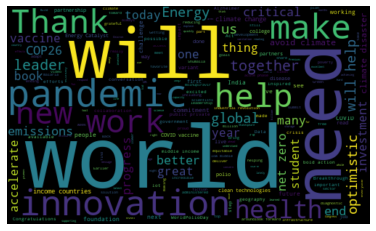

In [ ]:
#plot the word cloud
allWords = ' '.join( [twts for twts in df['Tweets']])
wordCloud = WordCloud(width = 500, height=300, random_state = 21, max_font_size = 119).generate(allWords)

plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis('off')
plt.show()

In [ ]:
# Create a function to compute negative (-1), neutral (0) and positive (+1) analysis
def getAnalysis(score):
 if score < 0:
  return 'Negative'
 elif score == 0:
  return 'Neutral'
 else:
  return 'Positive'
df['Analysis'] = df['Polarity'].apply(getAnalysis)
# Show the dataframe
df

,Tweets,Subjectivity,Polarity,Analysis
0,"Robots will play a huge part in our future, an...",0.615625,0.221875,Positive
1,Accelerating long-duration energy storage inno...,0.875000,0.375000,Positive
2,The is supporting GIISER which is working to ...,0.287500,0.187500,Positive
3,South Africa did the right thing by reporting ...,0.607143,0.183810,Positive
4,Experts like Trevor Bedford have done an excel...,0.818182,0.412121,Positive
...,...,...,...,...
95,A global response will help the world end the ...,0.480000,0.320000,Positive
96,Earlier I shared three actions that leaders co...,0.500000,0.250000,Positive
97,"If we want to stop Alzheimer’s disease, one of...",0.375000,0.375000,Positive
98,There are three things that can be done in the...,0.500000,0.200000,Positive


In [ ]:
# Printing positive tweets 
print('Printing positive tweets:\n')
j=1
sortedDF = df.sort_values(by=['Polarity']) #Sort the tweets
for i in range(0, sortedDF.shape[0] ):
  if( sortedDF['Analysis'][i] == 'Positive'):
    print(str(j) + ') '+ sortedDF['Tweets'][i])
    print()
    j= j+1

Printing positive tweets:

1) Robots will play a huge part in our future, and fiction like Kazuo Ishiguro's Klara and the Sun is a great way to explore what that might mean. 

2) Accelerating long-duration energy storage innovation can significantly reduce annual CO2 emissions and lay the foundation for a net-zero economy by 2050. 

3) The  is supporting GIISER which is working to increase the in-country capacity for rapid evaluation of variants on the African continent. This will help us better understand variants of concern and how the current vaccines may perform. 

4) South Africa did the right thing by reporting these cases. They have invested heavily in R&amp;D including genomic sequencing capabilities which have made it possible to quickly identify variants, like Omicron, and help the world respond appropriately.

5) Experts like Trevor Bedford have done an excellent job explaining what scientists have learned so far about the new variant of concern known as Omicron. 

6) I made

In [ ]:
# Printing negative tweets  
print('Printing negative tweets:\n')
j=1
sortedDF = df.sort_values(by=['Polarity'],ascending=False) #Sort the tweets
for i in range(0, sortedDF.shape[0] ):
  if( sortedDF['Analysis'][i] == 'Negative'):
    print(str(j) + ') '+sortedDF['Tweets'][i])
    print()
    j=j+1

Printing negative tweets:

1) There’s lots of speculation about what Shakespeare’s life was really like, but we do know that his son died at age 11. Hamnet shares the story of how grief tore the Shakespeare family apart. 

2) It’s hard to believe that it’s been 50 years since the 4004 kickstarted the PC era. I still remember reading about its release with Paul and dreaming about how the world's first microprocessor might shape the future. 

3) About 3.6 billion people—nearly half of the world’s population—lack toilets or use unsafe sanitation. This WorldToiletDay, I’m optimistic this sanitation crisis can be solved. 

4) To tackle the biggest global health challenges, all countries must have access to vaccines and other health innovations. This $150M commitment from the foundation and  will help low- and middle-income countries get the essential supplies they need. 

5) In addition to investments in reducing emissions to slow climate change, we need to help those already impacted by cl

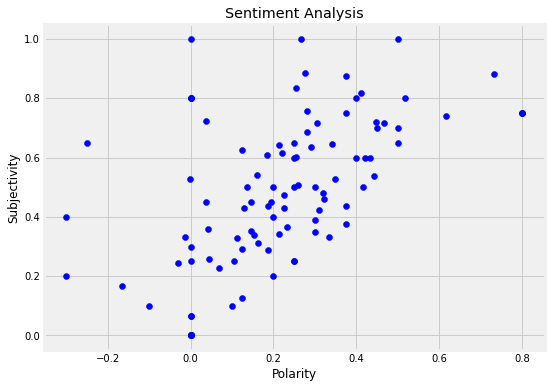

In [ ]:
# Plotting 
plt.figure(figsize=(8,6)) 
for i in range(0, df.shape[0]):
  plt.scatter(df["Polarity"][i], df["Subjectivity"][i], color='Blue') 
# plt.scatter(x,y,color)   
plt.title('Sentiment Analysis') 
plt.xlabel('Polarity') 
plt.ylabel('Subjectivity') 
plt.show()

In [ ]:
# Print the percentage of positive tweets
ptweets = df[df.Analysis == 'Positive']
ptweets = ptweets['Tweets']
ptweets

round( (ptweets.shape[0] / df.shape[0]) * 100 , 1)

77.0

In [ ]:
# Print the percentage of negative tweets
ntweets = df[df.Analysis == 'Negative']
ntweets = ntweets['Tweets']
ntweets

round( (ntweets.shape[0] / df.shape[0]) * 100, 1)

8.0

In [ ]:
# Show the value counts
df['Analysis'].value_counts()

Positive    77
Neutral     15
Negative     8
Name: Analysis, dtype: int64

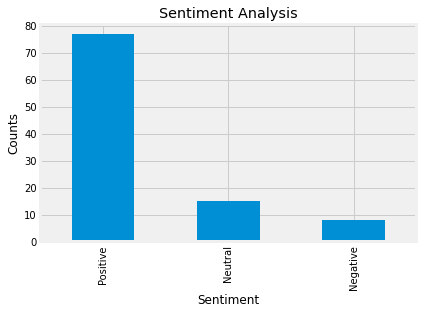

In [ ]:
# Plotting and visualizing the counts
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind = 'bar')
plt.show()